# Your Lab will get more retweets than your Pug, and other thoughts on WeRateDogs
### Author: Devin McCormack

Those familiar with the WeRateDogs [twitter account](https://twitter.com/dog_rates) know the difference between a good pupper and a doggo, and know that if you are rating a good dog out of 10 points, most of them deserve an 11. Those that aren't familiar will quickly see the charm and appeal of the account. Underneath this lighthearted twitter is a treasure trove of data for the curious dog lover.

Combining data from their twitter archive, API requested information about retweets and favorites per tweet, and a Neural Network prediction of dog breed based on images, I was able to answer some basic questions about rated dogs, like:

- What is the midpoint, and most common rating given?
- are puppers more liked than doggos? 
- Which dog breeds get the most retweets?


We know that all of the dogs are *good dogs*, but are some more "gooder" than others? First, I looked at the distribution of ratings:


In [1]:
from IPython.display import Image, HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')



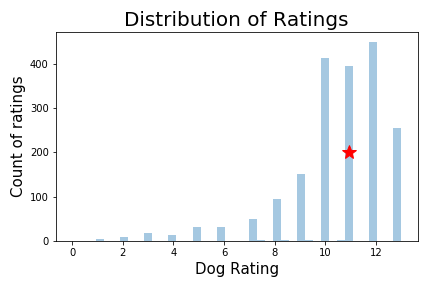

In [2]:
Image(filename='distofrating.png')

Here we see the median value, marked by a red star, indicating half of all ratings are at least 11 or higher. The most common rating is, in fact, 12/10. These are some good dogs!

This data included both the number of favorites (people saving a tweet to see later) and retweets (people spreading the tweet to their own followers) for all images. Both can be thought of as a measure of engagement with the dog; the more favorites and retweets, the more people that saved or shared the tweet. But is there a meaningful difference between favorites and retweets, or are they so correlated that they essentially indicate the same thing?

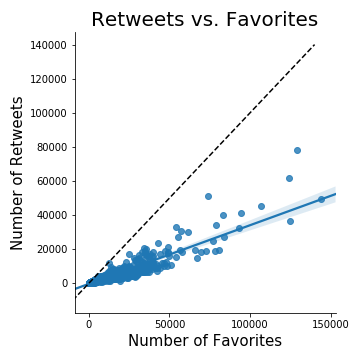

In [3]:
Image(filename='retweetvsfavorites.png')

Here we see a scatterplot with each tweet being a point, Solid blue line indicating a linear fit to the data, and black dotted line of unity (1 retweet to 1 favorite). Noteworthy is that all the tweets lie below the unity line, indicating that more people "selfishly" keep a reminder of the cute images to themselves rather than broadcasting it to their followers. Importantly, we see a good linear fit with a Pearson R value of about 0.92, indicating that Retweets and favorites are highly correlated. In essence, The more retweets, the more favorites, and vice-versa.

An important aspect of the WeRateDogs universe is that dogs can sometimes be grouped into a certain dog "stage" that describes the dog. For example, Most dogs can be classified as a doggo, but a exceptionally fluffy dog may be called a "floofer", a young dog may be a "pupper", and doggy adolescents are predictably called "puppos".

Now that we have established how both retweets and favorites can describe how much a dog is "liked", is there a difference between how liked the average "doggo" is to the average "pupper"?

In [4]:
import pandas as pd
df=pd.read_csv('twitter_archive_master.csv')
df[df.dog_stage!='multiple'].groupby('dog_stage').favorite_count.mean().to_frame()

,favorite_count
dog_stage,
None,8546.206959
doggo,19204.047619
floofer,13035.000000
pupper,7257.194030
puppo,22401.727273


Looking at these average values for favorites, I certainly expected that puppers would be more favorited than any other dog, but the data says differently! In fact an average doggo is going to get over twice as many favorites as the average pupper.

And lastly, considering the emergence of twitter celebrity dogs, do certain breeds get more retweets than others? If you wanted to be the owner/manager of an internet famous dog model, maybe you'd need to be selective on what kind of dog you get.

Looking at the neural network predictions, we what breed of dogs show up most often on the WeRateDogs twitter:

In [5]:
df.p1.value_counts().head(10).to_frame()

,p1
golden_retriever,136
Labrador_retriever,94
Pembroke,88
Chihuahua,78
pug,54
chow,41
Samoyed,40
Pomeranian,38
toy_poodle,37
malamute,29


Some of the most famous internet dogs are the teddybear-esque Pomeranians, or Pugs with personality. However, we see on WeRateDogs, that most of the dogs are the simple, down-to-earth retriever types. Do the internet famous breeds outperform the regular family dog?

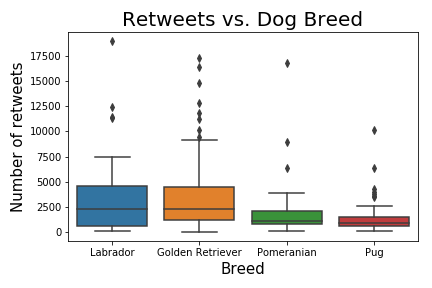

In [6]:
Image(filename='retweetvsdog.png')

Interestingly, the "blue collar" Labradors and Goldens seem to generate the most engagement on WeRateDogs! In fact, the boxplots indicate that over half of the Retrievers get more retweets than 75% of Pugs or Pomeranians! Maybe this is a function of the general audience of WeRateDogs (or twitter itself), or maybe people just enjoy seeing a good Retriever - since you can easily see those other dogs elsewhere on twitter.